In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go


# Import dataset

In [93]:
df = pd.read_csv('../data/raw/conversion_data_train.csv', sep=',')

In [94]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [95]:
df.shape

(284580, 6)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [97]:
df.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


## Vue générale

In [98]:
# Nombre de  valeurs manquantes
valeurs_manquantes = df.isna().sum()
valeurs_manquantes

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [99]:
# Pourcentage de valeurs manquantes
valeurs_manquantes_pourcent = (df.isna().sum() / df.shape[0]) * 100
valeurs_manquantes_pourcent

country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

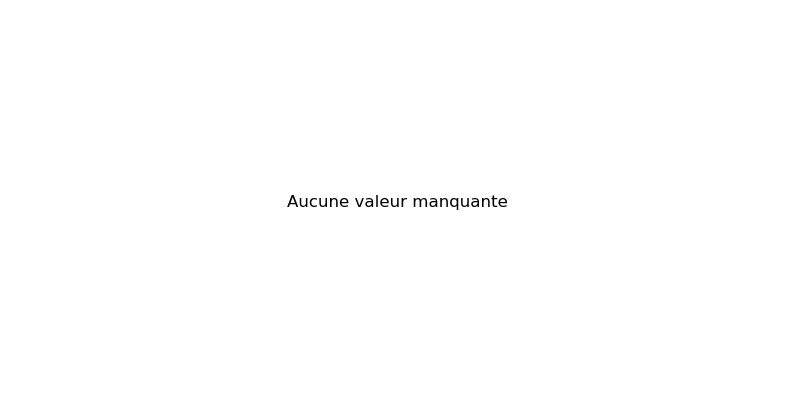

In [100]:
valeurs_manquantes_graph = valeurs_manquantes[valeurs_manquantes > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
# Prise en charge si valeurs manquetes à 0
if valeurs_manquantes_graph.empty:
    ax = plt.gca()
    ax.text(0.5, 0.5, "Aucune valeur manquante",
            ha="center", va="center", fontsize=12)
    ax.axis("off")
else:
    valeurs_manquantes_graph.plot(kind="bar")
    plt.title("Valeurs manquantes par colonne")
    plt.ylabel("Nombre de valeurs manquantes")
    plt.xticks(rotation=45, ha="right")

plt.show()

In [101]:
# Détection des noms de colonnes numériques ou catégorielles
numeric_features = df.select_dtypes(exclude="object").columns
categorical_features = df.select_dtypes(include="object").columns

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  Index(['age', 'new_user', 'total_pages_visited', 'converted'], dtype='object')
Found categorical features  Index(['country', 'source'], dtype='object')


In [102]:
# Vérification valeurs numériques float uniques
numeric_float = df.select_dtypes('float64')

for col in numeric_float.columns:
  print(f"Colonne {col} : ", numeric_float[col].nunique())

In [103]:
# Vérification valeurs numériques int uniques
numeric_int = df.select_dtypes('int64')

for col in numeric_int.columns:
  print(f"Colonne {col} : ", numeric_int[col].nunique())

Colonne age :  60
Colonne new_user :  2
Colonne total_pages_visited :  29
Colonne converted :  2


In [104]:
# Vérification valeurs non numériques float uniques
non_numeric = df.select_dtypes('object')

for col in non_numeric.columns:
  print(f"Colonne {col} : ", non_numeric[col].nunique())

Colonne country :  4
Colonne source :  3


# EDA : Analyse univariée

## Distribution par pays

In [105]:
country_distribution = df["country"].value_counts().reset_index()
country_distribution.columns = ["country", "count"]

fig = px.bar(
    country_distribution,
    x="country",
    y="count",
    text_auto=True,
)
fig.show()

## Distribution par âge

In [106]:
age_distribution = df[df["age"] <= 80]["age"].value_counts().reset_index()
age_distribution.columns = ["age", "count"]

fig = px.bar(
    age_distribution,
    x="age",
    y="count",
    text_auto=False,
)

fig.show()

## Distribution par new_user

In [107]:
new_user_distribution = df["new_user"].value_counts().reset_index()
new_user_distribution.columns = ["new_user", "count"]

fig = px.pie(
    new_user_distribution,
    names="new_user",
    values="count",
)

fig.show()

## Distribution par source

In [108]:
source_distribution = df["source"].value_counts().reset_index()

fig = px.pie(
    source_distribution,
    names="source",
    values="count",
)

fig.show()

## Distribution par pages visitées

In [109]:
total_pages_distribution = df["total_pages_visited"].value_counts().reset_index()

fig = px.bar(
    total_pages_distribution,
    x="total_pages_visited",
    y="count",
    text_auto=True,
)
fig.show()

## Distribution converted vs non converted

In [110]:
dist = df["converted"].value_counts().rename_axis("converted").reset_index(name="count")
dist["label"] = dist["converted"].map({0: "Non converti", 1: "Converti"})
dist["pct"] = dist["count"] / dist["count"].sum() * 100

fig = px.bar(
    dist.sort_values("converted"),
    x="label",
    y="pct",
    text=dist["pct"].map(lambda x: f"{x:.1f}%"),
    title="Taux de conversion",
)
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_title="Classe",
    yaxis_title="Part (%)",
    uniformtext_minsize=10,
    uniformtext_mode="hide",
    margin=dict(t=90)
)
fig.show()

# EDA : Analyse bivariée

## Taux de conversion par pays

In [111]:
country_conv = (
    df.groupby("country")["converted"]
      .mean()
      .reset_index()
      .sort_values("converted", ascending=False)
)

px.bar(
    country_conv,
    x="country",
    y="converted",
    text_auto=".2%",
    title="Conversion rate par pays"
).show()

## Taux de conversion par tranche d’âge

In [112]:
df_age = df.copy()

df_age["age_bin"] = pd.cut(
    df_age["age"],
    bins=[0, 24, 34, 44, 54, 80],
    labels=["<25", "25-34", "35-44", "45-54", "55+"]
)

age_conv = (
    df_age.groupby("age_bin")["converted"]
          .mean()
          .reset_index()
)

px.bar(
    age_conv,
    x="age_bin",
    y="converted",
    text_auto=".2%",
    title="Conversion par tranche d’âge"
).show()


C:\Users\jean-\AppData\Local\Temp\ipykernel_23448\3410485472.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Taux de conversion rate par new_user

In [113]:
conv_by_new = (
    df.groupby("new_user")["converted"]
      .mean()
      .reset_index()
      .sort_values("new_user")
)

conv_by_new["new_user"] = conv_by_new["new_user"].map({0: "Existing (0)", 1: "New (1)"})

fig = px.bar(
    conv_by_new,
    x="new_user",
    y="converted",
    text_auto=".2%",
    title="Conversion rate par new_user"
)
fig.show()


## Taux de conversion rate par source

In [114]:
conv_by_source = (
    df.groupby("source")["converted"]
      .mean()
      .reset_index()
      .sort_values("converted", ascending=False)
)

fig = px.bar(
    conv_by_source,
    x="source",
    y="converted",
    text_auto=".2%",
    title="Conversion rate by traffic source"
)
fig.show()

## Taux de conversion par nombre de pages visitées

In [118]:
df_pages = df.copy()

df_pages["pages_bin"] = pd.cut(
    df_pages["total_pages_visited"],
    bins=[0,1,2,3,4,5,7,10,20,100],
    labels=["1","2","3","4","5","6-7","8-10","11-20","20+"]
)

pages_conv = (
    df_pages.groupby("pages_bin")["converted"]
            .mean()
            .reset_index()
)

px.bar(
    pages_conv,
    x="pages_bin",
    y="converted",
    text_auto=".2%",
    title="Conversion par nombre de pages visitées"
).show()


C:\Users\jean-\AppData\Local\Temp\ipykernel_23448\868929686.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [116]:
# Conversion vs total_pages_visited (distribution)
fig_pages = px.histogram(
    df, x="total_pages_visited", color="converted",
    barmode="overlay", nbins=30,
    title="Distribution des pages visitées selon la conversion"
)

fig_pages.show()

In [ ]:
# Correlation heatmap
corr_matrix = df.corr(numeric_only=True)

fig_corr = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=corr_matrix.round(2).values,
    colorscale="Viridis",
    showscale=True
)
fig_corr.update_layout(title="Matrice de corrélation")

fig_corr.show()